# t-test

## Dependency

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
plt.style.use('default')

## Formula

$$
t_k = \frac{\bar{x} - \bar{y}}{s / \sqrt{n}} = \frac{\text{Difference of means}}{\text{Standard deviations}}
$$

The way to think about this is T-test measures the difference of means scaled by or normalized by standard deviations.

We want to have a positevely or negatively large t-value to reject the null hypothesis.

How can we get a large t-value?

$$
t_k = \frac{\bar{x} - \bar{y}}{s / \sqrt{n}} = \frac{\bar{x} - \bar{y} \sqrt{n}}{s}
$$

The $t$ will be larger if

- Increase the group difference $(\bar{x} - \bar{y})$
- Reduce variance $s$
- Increase sample size $n$

## One-sample t-test

It means testing whether a set of numbers could have been drawn from a distribution with a specific mean. The formula uses sample mean $\bar{x}$, $H_0$ value $\mu$, sample standard deviation $s$, number of data points $n$, and degrees of freedom $n - 1$. $n - 1$ because we are testing for a mean and once we have $n - 1$ data points the remaining one data value will be fixed.

$$
t_{n - 1} = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Assumption

- Data are numeric
- Date are independent from each other
- Data are randomply drawn from the population
- Mean and standard deviation are valid descriptors of central tendency and dispersion (i.e., data are approximately normally distributed).

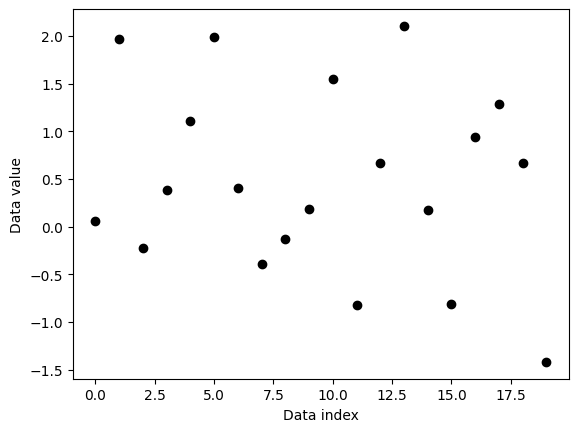

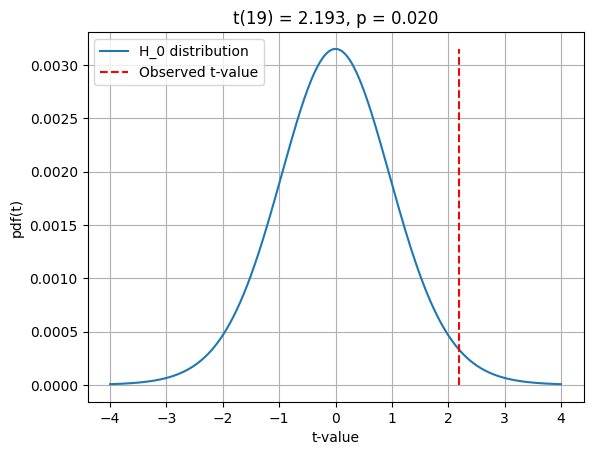

Scipy t-value: 2.193, p-value: 0.041

Manual t-test: 2.193, p-value: 0.020

Scipy uses two-tailed t-test, but here manual t-test does one-tailed t-test


In [29]:
n = 20
population_mean = 0.5
data = np.random.randn(n) + population_mean

plt.plot(data, 'ko')
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

# Compute value for t-test
null_hypothesis_value = 0
t_value = (np.mean(data) - null_hypothesis_value) / (np.std(data, ddof=1) / np.sqrt(n))
df = n - 1

# Compute p-value of t-test
p_value = 1 - stats.t.cdf(abs(t_value), df)


# Make null hypothesis distribution of the t-test
x = np.linspace(-4, 4, 1001)
t_distribution = stats.t.pdf(x, df) * np.mean(np.diff(x))

plt.plot(x, t_distribution)
plt.plot([t_value, t_value], [0, max(t_distribution)], 'r--')
plt.legend(['H_0 distribution', 'Observed t-value'])
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title(f't({df}) = {t_value:.3f}, p = {p_value:.3f}')
plt.grid()
plt.show()

# Compute the same by scipy
t_scipy, p_scipy = stats.ttest_1samp(data, null_hypothesis_value)
print(f'Scipy t-value: {t_scipy:.3f}, p-value: {p_scipy:.3f}')
print()
print(f'Manual t-test: {t_value:.3f}, p-value: {p_value:.3f}')
print()
print('Scipy uses two-tailed t-test, but here manual t-test does one-tailed t-test')

## Two-samples t-test

Test whether two sets of numbers could have been drawn from the same distribution.

The formula for the unequal N unequal variances is,

$$
t_{df} = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$
$$
df = n_1 + n_2 - 2
$$